In [1]:
# importing warnings library to handle exceptions, errors, and warning of the program
import warnings

# ignoring potential warnings of the program
warnings.filterwarnings('ignore')

In [2]:
# mounting google drive to read files stores in it
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# downloading glove dataset files from the internet
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-06-08 17:13:34--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-06-08 17:13:34--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-06-08 17:13:34--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [4]:
# extracting the downloaded zip file
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [5]:
# listing files and directories
!ls

drive		   glove.6B.200d.txt  glove.6B.50d.txt	sample_data
glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip


In [6]:
# importing pandas library to perform data manipulation and analysis
import pandas as pd

# configuring the pandas dataframes to show all columns
pd.options.display.max_columns = None

In [7]:
# importing the cleaned qqp.csv dataset to a pandas dataframe
# dataset includes quora question pairs with their duplicate status
df = pd.read_csv('drive/MyDrive/preprocessed_datasets/qqp.csv')
df

,question1,question2,preprocessed_question_1,preprocessed_question_2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,"['step', 'step', 'guide', 'invest', 'share', '...","['step', 'step', 'guide', 'invest', 'share', '...",0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,"['story', 'kohinoor', 'kohinoor', 'diamond']","['would', 'happen', 'indian', 'government', 's...",0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,"['increase', 'speed', 'internet', 'connection'...","['internet', 'speed', 'increased', 'hacking', ...",0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,"['mentally', 'lonely', 'solve']","['find', 'remainder', 'math2324math', 'divided...",0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,"['one', 'dissolve', 'water', 'quikly', 'sugar'...","['fish', 'would', 'survive', 'salt', 'water']",0
...,...,...,...,...,...
404282,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,"['many', 'keywords', 'racket', 'programming', ...","['many', 'keywords', 'perl', 'programming', 'l...",0
404283,Do you believe there is life after death?,Is it true that there is life after death?,"['believe', 'life', 'death']","['true', 'life', 'death']",1
404284,What is one coin?,What's this coin?,"['one', 'coin']","['whats', 'coin']",0
404285,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,"['approx', 'annual', 'cost', 'living', 'studyi...","['little', 'hairfall', 'problem', 'want', 'use...",0


In [8]:
# printing a concise summary of the dataframe
# information such as index, data type, columns, non-null values, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404287 entries, 0 to 404286
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   question1                404287 non-null  object
 1   question2                404287 non-null  object
 2   preprocessed_question_1  404287 non-null  object
 3   preprocessed_question_2  404287 non-null  object
 4   is_duplicate             404287 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 15.4+ MB


In [9]:
# assigning two feature attributes to X
X = df[['preprocessed_question_1', 'preprocessed_question_2']]
X

,preprocessed_question_1,preprocessed_question_2
0,"['step', 'step', 'guide', 'invest', 'share', '...","['step', 'step', 'guide', 'invest', 'share', '..."
1,"['story', 'kohinoor', 'kohinoor', 'diamond']","['would', 'happen', 'indian', 'government', 's..."
2,"['increase', 'speed', 'internet', 'connection'...","['internet', 'speed', 'increased', 'hacking', ..."
3,"['mentally', 'lonely', 'solve']","['find', 'remainder', 'math2324math', 'divided..."
4,"['one', 'dissolve', 'water', 'quikly', 'sugar'...","['fish', 'would', 'survive', 'salt', 'water']"
...,...,...
404282,"['many', 'keywords', 'racket', 'programming', ...","['many', 'keywords', 'perl', 'programming', 'l..."
404283,"['believe', 'life', 'death']","['true', 'life', 'death']"
404284,"['one', 'coin']","['whats', 'coin']"
404285,"['approx', 'annual', 'cost', 'living', 'studyi...","['little', 'hairfall', 'problem', 'want', 'use..."


In [10]:
# assigning target variable to y
y = df['is_duplicate']
y

0         0
1         0
2         0
3         0
4         0
         ..
404282    0
404283    1
404284    0
404285    0
404286    0
Name: is_duplicate, Length: 404287, dtype: int64

In [11]:
# importing train_test_split from scikit-learn library
from sklearn.model_selection import train_test_split

# splitting data into random train and test subsets
# train set - 80%, test set - 20%
# when random_state set to an int, train_test_split will return same results for each execution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# features of train data
X_train

,preprocessed_question_1,preprocessed_question_2
174949,"['india', 'job', 'option', 'future', 'option',...","['job', 'career', 'india', 'currently', 'third..."
119442,"['world', 'best', 'romantic', 'movie']","['best', 'romantic', 'movie', 'time']"
252941,"['best', 'place', 'live', 'hyderabad']","['best', 'place', 'live', 'hyderabad', 'mumbai']"
13551,"['athlete', 'month']","['shop', 'act', 'licence']"
274896,"['learn', 'code', 'wordpress']","['much', 'time', 'learn', 'code', 'wordpress',..."
...,...,...
259178,"['power', 'positive', 'thinking']","['cultivate', 'power', 'positive', 'thinking']"
365838,"['thing', 'new', 'employee', 'know', 'going', ...","['thing', 'new', 'employee', 'know', 'going', ..."
131932,"['currently', 'winning', 'presidential', 'elec...","['bias', 'aside', 'point', 'time', 'think', 'w..."
146867,"['telugutamilhindi', 'movie', 'leading', 'acto...","['fix', 'internet', 'connection', 'available',..."


In [13]:
# shape of train features dataframe
X_train.shape

(323429, 2)

In [14]:
# targets of train data
y_train

174949    0
119442    1
252941    0
13551     0
274896    1
         ..
259178    0
365838    0
131932    1
146867    0
121958    0
Name: is_duplicate, Length: 323429, dtype: int64

In [15]:
# shape of train targets dataframe
y_train.shape

(323429,)

In [16]:
# features of test data
X_test

,preprocessed_question_1,preprocessed_question_2
8067,"['play', 'pokémon', 'go', 'korea']","['play', 'pokémon', 'go', 'china']"
224277,"['breathing', 'treatment', 'help', 'cough']","['help', 'someone', 'unconscious', 'still', 'b..."
252450,"['kellyanne', 'conway', 'annoying', 'opinion']","['kellyanne', 'conway', 'really', 'imply', 'pa..."
174038,"['rate', '110', 'review', 'maruti', 'baleno']","['career', 'option', 'one', 'completing', 'bac..."
384860,"['good', 'book', 'marketing']","['best', 'book', 'ever', 'written', 'marketing']"
...,...,...
37520,"['reason', 'behind', 'sudden', 'end', 'white',...","['favorite', 'tv', 'show', 'end']"
75814,"['ever', 'sex', 'car']","['toip', 'professor', 'artificial', 'intellige..."
79271,"['recent', 'research', 'idea', 'convex', 'hull...","['indian', 'feel', 'controversial', 'answer', ..."
25953,"['choose', 'reading', 'either', 'fiction', 'no...","['choose', 'one', 'fiction', 'one', 'nonfictio..."


In [17]:
# shape of test features dataframe
X_test.shape

(80858, 2)

In [18]:
# targets of test data
y_test

8067      0
224277    0
252450    0
174038    0
384860    1
         ..
37520     0
75814     0
79271     0
25953     0
99888     0
Name: is_duplicate, Length: 80858, dtype: int64

In [19]:
# shape of test targets dataframe
y_test.shape

(80858,)

In [20]:
# importing Tokenizer from keras library
# keras is a high-level api of tensorflow
# keras.preprocessing.text provides keras data preprocessing utils to pre-process datasets
# with textual data before they are fed to the machine learning model
from keras.preprocessing.text import Tokenizer

# Tokenizer allows to vectorize a text corpus, by turning each text into either a sequence
# of integers (each integer being the index of a token in a dictionary) or into a vector where
# the coefficient for each token could be binary, based on word count, based on tf-idf
tokenizer = Tokenizer()

In [21]:
# updates internal vocabulary based on a list of texts
# required before using texts_to_sequences
tokenizer.fit_on_texts(X_train['preprocessed_question_1'].values)
tokenizer.fit_on_texts(X_train['preprocessed_question_2'].values)

In [22]:
# transforms each text to a sequence of integers
X_train_q1_sequence = tokenizer.texts_to_sequences(X_train['preprocessed_question_1'].values)
X_train_q2_sequence = tokenizer.texts_to_sequences(X_train['preprocessed_question_2'].values)
X_test_q1_sequence = tokenizer.texts_to_sequences(X_test['preprocessed_question_1'].values)
X_test_q2_sequence = tokenizer.texts_to_sequences(X_test['preprocessed_question_2'].values)

# printing train features dataframe first row question 1 column for visualization purposes
X_train_q1_sequence[0]

[3, 32, 275, 238, 275, 593, 1943, 1263, 872, 69, 67, 3, 4004]

In [23]:
# lengths of each generated sequences of integers in train features dataframe question 1 column
length_of_sequence = [len(sequence) for sequence in X_train_q1_sequence]

# printing the train features dataframe first row question 1 column length
length_of_sequence[0]

13

In [24]:
# importing numpy library
# used to perform fast mathematical operations over python arrays and lists
import numpy as np

# maximum length of a sequence in the train features dataframe question 1 column
np.max(length_of_sequence)

54

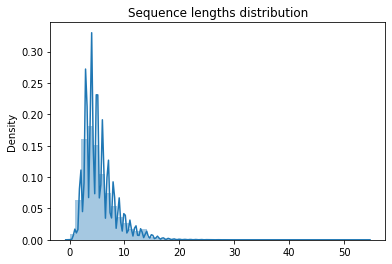

In [25]:
# importing pyplot from matplotlib library to create interactive visualizations
import matplotlib.pyplot as plt

# importing seaborn library which is built on top of matplotlib to create statistical graphics
import seaborn as sns

# plot a univariate distribution of observations for sequence lengths
sns.distplot(length_of_sequence)
plt.title('Sequence lengths distribution')
plt.savefig('plots/length_of_sequence.png', facecolor='white')
plt.show()

In [26]:
# importing utilities for preprocessing sequence data from keras library
from keras.preprocessing.sequence import pad_sequences

# defining a maximum sequence length based on the distribution plot observations
maximum_sequence_length = 30

In [27]:
# pad_sequences pads sequences to the same length
# padding='post' to pad after each sequence
X_train_q1_sequence = pad_sequences(X_train_q1_sequence, maxlen=maximum_sequence_length, padding='post')
X_train_q2_sequence = pad_sequences(X_train_q2_sequence, maxlen=maximum_sequence_length, padding='post')
X_test_q1_sequence = pad_sequences(X_test_q1_sequence, maxlen=maximum_sequence_length, padding='post')
X_test_q2_sequence = pad_sequences(X_test_q2_sequence, maxlen=maximum_sequence_length, padding='post')

# printing train features dataframe first row question 1 column for visualization purposes
X_train_q1_sequence[0]

array([   3,   32,  275,  238,  275,  593, 1943, 1263,  872,   69,   67,
          3, 4004,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [28]:
# second row of train features dataframe
X_train.iloc[1,]

preprocessed_question_1    ['world', 'best', 'romantic', 'movie']
preprocessed_question_2     ['best', 'romantic', 'movie', 'time']
Name: 119442, dtype: object

In [29]:
# second row of train target dataframe
# 0 - not duplicate
# 1 - duplicate
y_train.iloc[1,]

1

In [30]:
# sequence for second row of train features dataframe question 1 column
X_train_q1_sequence[1]

array([  43,    1, 1344,   34,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [31]:
# sequence for second row of train features dataframe question 2 column
X_train_q2_sequence[1]

array([   1, 1344,   34,   12,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [32]:
# fourth row of train features dataframe
X_train.iloc[3,]

preprocessed_question_1          ['athlete', 'month']
preprocessed_question_2    ['shop', 'act', 'licence']
Name: 13551, dtype: object

In [33]:
# fourth row of train target dataframe
# 0 - not duplicate
# 1 - duplicate
y_train.iloc[3,]

0

In [34]:
# sequence for second row of train features dataframe question 1 column
X_train_q1_sequence[3]

array([3325,  126,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [35]:
# sequence for second row of train features dataframe question 2 column
X_train_q2_sequence[3]

array([1528,  909, 6163,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [36]:
# declaring word_vectors dictionary
word_vectors = dict()

# GloVe is an unsupervised learning algorithm for obtaining vector representations for words
# Training is performed on aggregated global word-word co-occurrence statistics from a corpus
# Resulting representations show interesting linear substructures of the word vector space
# This dataset contains English word vectors pre-trained on the combined Wikipedia corpora
# GloVe embeddings use these pre-trained embeddings to quantify word co-occurrence
# GloVe embeddings capture some aspects of word meaning
filename = 'glove.6B.300d.txt'

# open text file with glove embeddings
file = open(filename, encoding='utf8')

# reading the file line by line
# tokenizing each line into tokens
# adding data to word_vectors dictionary
for line in file:
    tokens = line.split()
    word_vectors[tokens[0]] = np.asarray(tokens[1:], dtype='float32')

# closing the file
file.close()

In [37]:
# importing islice method from itertools library
# itertools provides functional tools for creating and using iterators
from itertools import islice

# returning an iterator whose next() method returns selected values from an iterable
list(islice(word_vectors.keys(), 15))

['the',
 ',',
 '.',
 'of',
 'to',
 'and',
 'in',
 'a',
 '"',
 "'s",
 'for',
 '-',
 'that',
 'on',
 'is']

In [38]:
# length of word vector for the word 'hello'
len(word_vectors['hello'])

300

In [39]:
# printing word vector for the word 'hello'
word_vectors['hello']

array([-3.3712e-01, -2.1691e-01, -6.6365e-03, -4.1625e-01, -1.2555e+00,
       -2.8466e-02, -7.2195e-01, -5.2887e-01,  7.2085e-03,  3.1997e-01,
        2.9425e-02, -1.3236e-02,  4.3511e-01,  2.5716e-01,  3.8995e-01,
       -1.1968e-01,  1.5035e-01,  4.4762e-01,  2.8407e-01,  4.9339e-01,
        6.2826e-01,  2.2888e-01, -4.0385e-01,  2.7364e-02,  7.3679e-03,
        1.3995e-01,  2.3346e-01,  6.8122e-02,  4.8422e-01, -1.9578e-02,
       -5.4751e-01, -5.4983e-01, -3.4091e-02,  8.0017e-03, -4.3065e-01,
       -1.8969e-02, -8.5670e-02, -8.1123e-01, -2.1080e-01,  3.7784e-01,
       -3.5046e-01,  1.3684e-01, -5.5661e-01,  1.6835e-01, -2.2952e-01,
       -1.6184e-01,  6.7345e-01, -4.6597e-01, -3.1834e-02, -2.6037e-01,
       -1.7797e-01,  1.9436e-02,  1.0727e-01,  6.6534e-01, -3.4836e-01,
        4.7833e-02,  1.6440e-01,  1.4088e-01,  1.9204e-01, -3.5009e-01,
        2.6236e-01,  1.7626e-01, -3.1367e-01,  1.1709e-01,  2.0378e-01,
        6.1775e-01,  4.9075e-01, -7.5210e-02, -1.1815e-01,  1.86

In [40]:
# calculating vocabulary_size using word_index of keras.preprocessing.text.Tokenizer
vocabulary_size = len(tokenizer.word_index) + 1
vocabulary_size

90228

In [41]:
# printing length of word_vectors dictionary
len(word_vectors)

400000

In [42]:
# initializing the embedding_matrix
embedding_matrix = np.zeros((vocabulary_size, len(word_vectors['hello'])))
embedding_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
# printing the shape of embedding_matrix
embedding_matrix.shape

(90228, 300)

In [44]:
embedding_vector = None
absent_words = []

# adding values to embedding_matrix
for word, index in tokenizer.word_index.items():
    if word in word_vectors.keys():
        embedding_vector = word_vectors.get(word)
    else:
        absent_words.append(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
    else:
        embedding_matrix[index] = np.zeros(300)

In [45]:
# printing the length of absent_words
len(absent_words)

90224

In [46]:
# printing embedding_vector
embedding_vector

array([ 3.0044e-01, -3.7188e-01,  1.0724e-01, -1.9289e-01, -5.1060e-01,
       -1.2087e-01,  2.1063e-01, -4.5131e-01,  3.0004e-01,  6.6559e-01,
       -5.7364e-01,  2.0517e-01,  3.5263e-01, -2.9808e-01, -2.3812e-01,
       -4.2399e-01,  1.7186e-01, -3.4199e-01, -2.1042e-02, -3.1233e-01,
        3.8718e-01, -1.6515e-01, -6.8522e-01,  3.9468e-03,  1.2868e+00,
        5.0385e-01, -3.7968e-01, -2.4237e-01,  1.1127e-01,  3.3993e-01,
        1.9339e-01,  4.7290e-03, -1.1999e-01, -6.2747e-01,  1.0126e+00,
       -6.0332e-01, -4.3577e-01,  1.1152e-01,  8.3210e-01,  8.0082e-01,
       -1.0691e+00,  6.6248e-01, -4.4152e-01,  2.3653e-01, -2.2258e-01,
        7.9283e-01,  8.8224e-02,  5.1054e-02,  6.4716e-01, -5.8385e-01,
        3.9475e-01,  2.5694e-01, -4.3593e-01,  2.9722e-01, -3.9855e-01,
        4.9197e-02, -1.4372e-01, -1.7786e-01, -4.1682e-01,  6.9316e-01,
        5.0839e-01,  1.0446e-01,  1.0007e+00, -4.1412e-01,  1.2250e-01,
        5.6642e-01,  6.0360e-01, -2.5471e-01,  1.1773e-02,  8.82

In [47]:
# printing the shape of embedding_vector
embedding_vector.shape

(300,)

In [48]:
# printing embedding_matrix
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.30044001, -0.37187999,  0.10724   , ..., -0.17862999,
         0.27575999,  0.20545   ],
       [ 0.30044001, -0.37187999,  0.10724   , ..., -0.17862999,
         0.27575999,  0.20545   ],
       [ 0.30044001, -0.37187999,  0.10724   , ..., -0.17862999,
         0.27575999,  0.20545   ]])

In [49]:
# importing Input function from keras layers api package
# used to instantiate a keras tensor
# keras tensor is a symbolic tensor-like object, which can be augmented
# with certain attributes that allow us to build a keras model by just
# knowing the inputs and outputs of the model
from keras.layers import Input

In [50]:
input_1 = Input(shape=(X_train_q1_sequence.shape[1],))
input_2 = Input(shape=(X_train_q2_sequence.shape[1],))

In [51]:
# importing Embedding class from keras layers api package
# turning positive integers (indexes) into dense vectors of fixed size
# this layer can only be used as the first layer in a model
from keras.layers import Embedding

In [52]:
common_embed = Embedding(name='synopsis_embedd',
                         input_dim=len(tokenizer.word_index) + 1,
                         output_dim=len(word_vectors['hello']),
                         weights=[embedding_matrix],
                         input_length=X_train_q1_sequence.shape[1],
                         trainable=False)

In [53]:
lstm_1 = common_embed(input_1)
lstm_2 = common_embed(input_2)

In [54]:
# importing LSTM class from keras layers api package
# LSTM - Long Short-Term Memory layer
from keras.layers import LSTM

In [55]:
common_lstm = LSTM(64, return_sequences=True, activation='relu')

In [56]:
vector_1 = common_lstm(lstm_1)
vector_2 = common_lstm(lstm_2)

In [57]:
# importing Flatten class from keras layers api package
# used to flattens the input without affecting the batch size
from keras.layers import Flatten

In [58]:
vector_1 = Flatten()(vector_1)
vector_2 = Flatten()(vector_2)

In [59]:
# importing Subtract class from keras layers api package
# used to subtract two inputs
# takes as input a list of tensors of size 2, both of the same shape, and
# returns a single tensor, (inputs[0] - inputs[1]), also of the same shape
from keras.layers import Subtract

In [60]:
x3 = Subtract()([vector_1, vector_2])

In [61]:
# importing Multiply class from keras layers api package
# used to multiply (element-wise) a list of inputs
# takes a list of tensors as input, all of the same shape, and returns
# a single tensor (also of the same shape)
from keras.layers import Multiply

In [62]:
x3 = Multiply()([x3, x3])

In [63]:
x1_ = Multiply()([vector_1, vector_1])
x2_ = Multiply()([vector_2, vector_2])

In [64]:
x4 = Subtract()([x1_, x2_])

In [65]:
# importing Lambda class from core keras layers module in keras layers api package
# Lambda class wraps arbitrary expressions as a Layer object
# Lambda layer exists so that arbitrary expressions can be used as a Layer when
# constructing Sequential and Functional API models
# Lambda layers are best suited for simple operations or quick experimentation
from keras.layers.core import Lambda

In [66]:
# importing keras backend api from keras api
from keras import backend as k

In [67]:
# function to calculate cosine distance
def cosine_distance(vests):
    x, y = vests
    x = k.l2_normalize(x, axis=-1)
    y = k.l2_normalize(y, axis=-1)
    return -k.mean(x * y, axis=-1, keepdims=True)

In [68]:
# function to return cosine distance output shape
def cosine_distance_output_shape(shapes):
    shape1, shape2 = shapes
    return shape1[0], 1

In [69]:
x5 = Lambda(cosine_distance, output_shape=cosine_distance_output_shape)([vector_1, vector_2])

In [70]:
# importing Concatenate class from keras layers api package
# functional interface to the Concatenate layer which concatenates a list of inputs
# a list of tensors is taken as the input, all of the same shape except for the
# concatenation axis, and returns a single tensor that is the concatenation of all inputs
from keras.layers import Concatenate

In [71]:
conc = Concatenate(axis=-1)([x5, x4, x3])

In [72]:
# importing Dense class from keras layers api package
# Dense class is a regular densely-connected neural network layer
# Dense implements the operation: output = activation(dot(input, kernel) + bias)
# activation is the element-wise activation function passed as the activation argument
# kernel is a weights matrix created by the layer
# bias is a bias vector created by the layer (only applicable if use_bias is True)
from keras.layers import Dense

In [73]:
x = Dense(100, activation='relu', name='conc_layer')(conc)

In [74]:
# importing Dropout class from keras layers api package
# used to randomly set input units to 0 with a frequency of rate at
# each step during training time, which helps prevent overfitting
# inputs not set to 0 are scaled up by 1 / (1 - rate) such that the
# sum over all inputs is unchanged
from keras.layers import Dropout

In [75]:
x = Dropout(0.01)(x)

In [76]:
out = Dense(1, activation='sigmoid', name='out')(x)

In [77]:
# importing Model from keras
# Model groups layers into an object with training and inference features
from keras.models import Model

In [78]:
model = Model([input_1, input_2], out)

In [79]:
# importing the optimizer that implements the Adam algorithm from keras
# Adam optimization is a stochastic gradient descent method that is based
# on adaptive estimation of first-order and second-order moments
# from tensorflow.keras.optimizers import Adam

In [80]:
# importing roc_auc_score from metrics package of scikit-learn library
# roc_auc_score computes area under the receiver operating characteristic
# curve (roc auc) from prediction scores
from sklearn.metrics import roc_auc_score

In [81]:
# importing tensorflow library
# it is a free and open-source software library for machine learning
# used across a range of machine learning related tasks
# focus on training and inference of deep neural networks
import tensorflow as tf

In [82]:
# py_function wraps a python function into a tensorflow op that executes it eagerly
# py_function allows expressing computations in a tensorflow graph as Python functions
# auroc - area under the receiver operating characteristic curve
def auroc(y_true, y_pred):
    return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)

In [83]:
# compiling model
model.compile(loss='binary_crossentropy',
              metrics=['acc', auroc],
              optimizer='adam')

In [84]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
synopsis_embedd (Embedding)     (None, 30, 300)      27068400    input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 30, 64)       93440       synopsis_embedd[0][0]        

In [85]:
# Fit the model
model.fit([X_train_q1_sequence, X_train_q2_sequence],
          y_train.values.reshape(-1, 1),
          epochs=10,
          batch_size=64,
          validation_data=([X_test_q1_sequence, X_test_q2_sequence],
                           y_test.values.reshape(-1, 1)))

5054/5054 [==============================] - 457s 85ms/step - loss: 0.5863 - acc: 0.6713 - auroc: 0.7186 - val_loss: 0.5843 - val_acc: 0.6739 - val_auroc: 0.7149


In [86]:
model.metrics_names

['loss', 'acc', 'auroc']

In [87]:
model.evaluate([X_test_q1_sequence, X_test_q2_sequence],
               y_test,
               verbose=1,
               use_multiprocessing=True,
               return_dict=True)

2527/2527 [==============================] - 45s 17ms/step - loss: 0.5843 - acc: 0.6739 - auroc: 0.7151


{'acc': 0.6738851070404053,
 'auroc': 0.71513432264328,
 'loss': 0.5843492746353149}

In [88]:
model_json = model.to_json()

with open('models/model.json', 'w') as json_file:
    json_file.write(model_json)

In [89]:
# serialize weights to HDF5
model.save_weights('models/model.h5')

In [90]:
# load json and create model
json_file = open('models/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

In [91]:
from keras.models import model_from_json

loaded_model = model_from_json(loaded_model_json)

In [92]:
# load weights into new model
loaded_model.load_weights('models/model.h5')

In [ ]:
# importing pickle module
# used for serializing and deserializing a python object structure
# import pickle

In [ ]:
# model.save('models/model.h5')

In [ ]:
# importing load_model from keras.models
# used to load a model saved via model.save() function
# from keras.models import load_model

In [ ]:
# loaded_model = load_model('model.h5', custom_objects=auroc)

In [97]:
loaded_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['acc', auroc])

In [98]:
X_train_q1_sequence[0].reshape(-1, 1)

array([[   3],
       [  32],
       [ 275],
       [ 238],
       [ 275],
       [ 593],
       [1943],
       [1263],
       [ 872],
       [  69],
       [  67],
       [   3],
       [4004],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0]], dtype=int32)

In [99]:
loaded_model.predict([X_train_q1_sequence, X_train_q2_sequence], verbose=1)

10108/10108 [==============================] - 151s 15ms/step


array([[0.08387351],
       [0.57591057],
       [0.57591057],
       ...,
       [0.3545969 ],
       [0.092738  ],
       [0.10558784]], dtype=float32)

In [100]:
[[X_train_q1_sequence[1]], [X_train_q2_sequence[1]]]

[[array([  43,    1, 1344,   34,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)],
 [array([   1, 1344,   34,   12,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)]]

In [101]:
[X_train_q1_sequence, X_train_q2_sequence]

[array([[    3,    32,   275, ...,     0,     0,     0],
        [   43,     1,  1344, ...,     0,     0,     0],
        [    1,    94,   132, ...,     0,     0,     0],
        ...,
        [  790,  1367,   361, ...,     0,     0,     0],
        [69768,    34,  3463, ...,     0,     0,     0],
        [  805,   868, 19789, ...,     0,     0,     0]], dtype=int32),
 array([[  32,  188,    3, ...,    2, 2918,   32],
        [   1, 1344,   34, ...,    0,    0,    0],
        [   1,   94,  132, ...,    0,    0,    0],
        ...,
        [4464, 4571,  360, ...,    0,    0,    0],
        [ 636,  276, 1486, ...,    0,    0,    0],
        [1664, 4102,  105, ...,    0,    0,    0]], dtype=int32)]

In [102]:
import numpy as np

answer_1 = loaded_model.predict([
    np.array([[43, 1, 1344, 34, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
    np.array([[43, 1, 1344, 34, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
], verbose=1)

answer_1[0][0]

1/1 [==============================] - 1s 1s/step


0.57591057

In [103]:
answer_2 = loaded_model.predict([
    np.array([[43, 1, 1344, 34, 0, 14, 0, 0, 25, 0, 0, 25, 0, 0, 10, 0, 0, 0, 0, 44, 0, 10, 0, 0, 11, 0, 0, 0, 0, 0]]),
    np.array([[43, 1, 1344, 34, 0, 7, 0, 50, 0, 0, 0, 1110, 0, 0, 0, 50, 0, 40, 0, 0, 50, 0, 0, 0, 3, 0, 0, 0, 0, 0]])
], verbose=1)

answer_2[0][0]

1/1 [==============================] - 0s 17ms/step


0.57591057